In [16]:
import pandas as pd
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
df_original = pd.read_excel("publish\data\P1-Golden.xlsx")

In [3]:
df_augmented = pd.read_csv("data/balanced_augmentation_dataset.csv")

In [4]:
df_original.head()

,reviews,Judgement
0,Well done Microsoft!! OneNote is a fantastic p...,1
1,This works on a limited basis. Works well for...,1
2,This app was great for the first month or two....,1
3,I can't update it in my phone it takes way too...,1
4,Why is it so big?!!,1


In [5]:
df_augmented.rename(columns={"Useful?":"Judgement", "Reviews":"reviews"}, inplace=True)

In [6]:
df_combined = pd.concat([df_original, df_augmented])
df_combined.sample(5)

,reviews,Judgement,Labeler,Comments,Original_type
235,Great sync between Microsoft and Apple products,1,NaN,NaN,NaN
169,FUN! Verry hard,0,NaN,NaN,NaN
653,Google Maps gets me everywhere... I wish I cou...,0,Joanna,NaN,mis
142,"This app is amazing for any lake, bay, or ocea...",0,Romario,NaN,mis
90,It'll do I'm easy,0,NaN,NaN,NaN


In [7]:
useful = df_combined[df_combined.Judgement==1]
useless= df_combined[df_combined.Judgement==0]

# Length (# of words) distribution

Text(0.5, 1.0, 'Review length distribution for useful reviews')

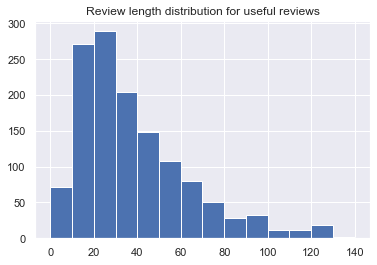

In [8]:
useful.reviews.apply(lambda x: len(word_tokenize(x))).hist(bins=[i for i in range(0,150, 10)])
plt.title("Review length distribution for useful reviews")

Text(0.5, 1.0, 'Review length distribution for useless reviews')

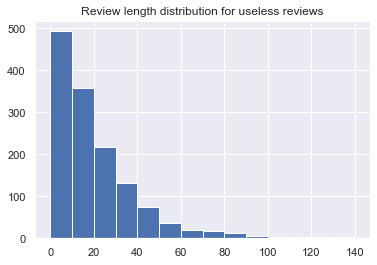

In [9]:
useless.reviews.apply(lambda x: len(word_tokenize(x))).hist(bins=[i for i in range(0,150, 10)])
plt.title("Review length distribution for useless reviews")

# Word Cloud

In [30]:
def generate_word_cloud(df, type="useful"):
    review_words = []
    for review in df.reviews:
        review_words += word_tokenize(review)

    review_words = [word.lower() for word in review_words]
    review_words = [word for word in review_words if word.strip() not in ["app", "game", "s", "n't", "."]]
    review_words = " ".join(review_words)
    #print(review_words)
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = set(STOPWORDS),
                    min_font_size = 10).generate(review_words)

    plt.figure(figsize = (28,28))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Word Cloud for {type} reviews ", fontsize=46)
    plt.show()

## Useful reviews word cloud:

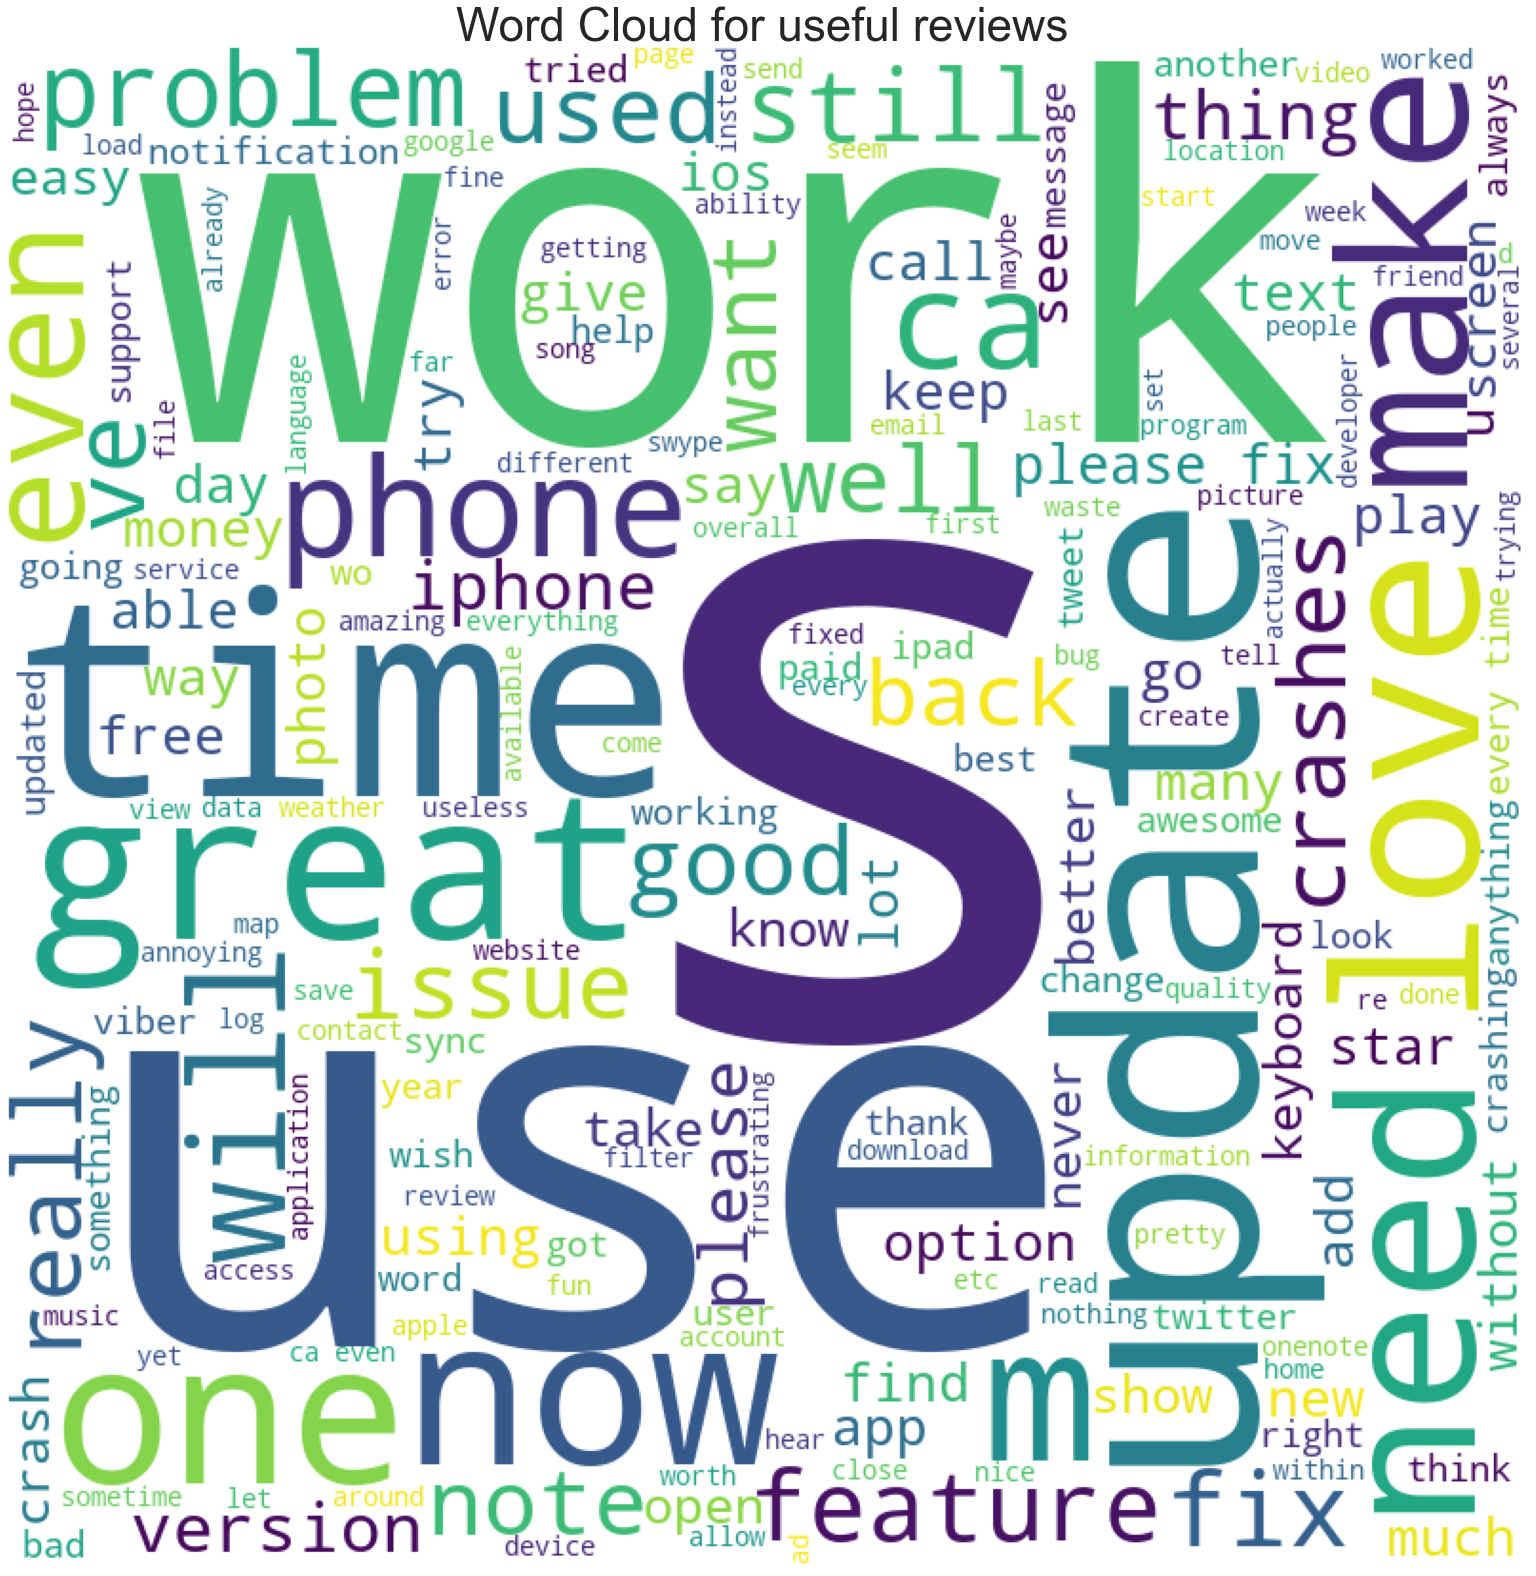

In [31]:
generate_word_cloud(useful)

## Useless reviews word cloud:

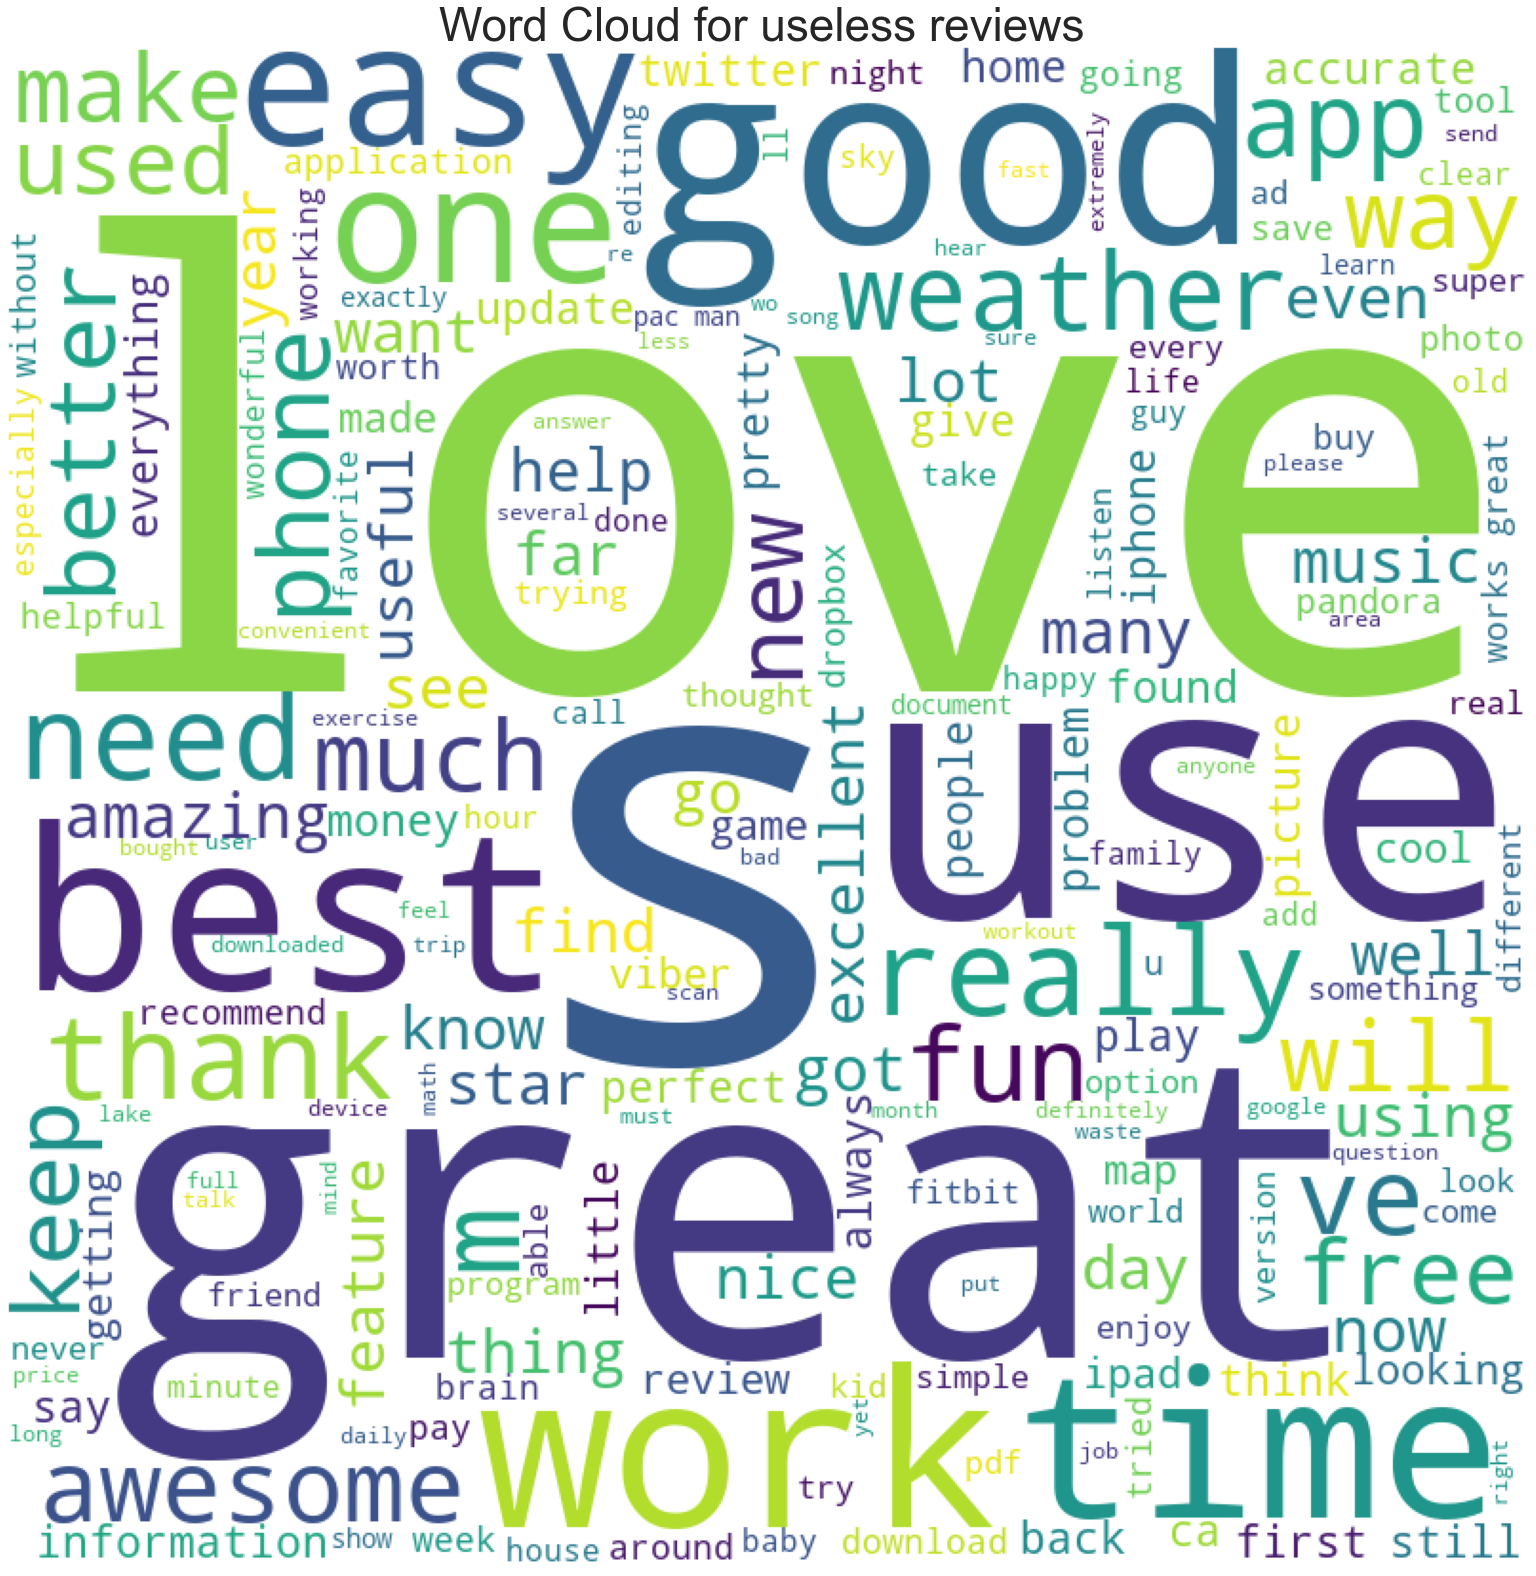

In [32]:
generate_word_cloud(useless, "useless")

# Capital letter count and examples

In [55]:
def count_upper_perc(s):
    count = 0
    for c in s:
        if c.isupper():
            count += 1
    return count / len(s.replace(" ", "")) # normalize over all non-whitespace characters

In [58]:
count_upper_perc("WHAT ARE YOU DOING?")

0.9375

Text(0.5, 1.0, 'Percentage of uppercase letters for useful reviews')

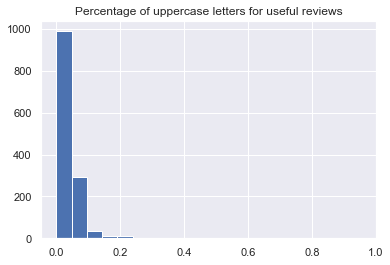

In [65]:
useful.reviews.apply(lambda x: count_upper_perc(x)).hist(bins=20)
plt.title("Percentage of uppercase letters for useful reviews")

Text(0.5, 1.0, 'Percentage of uppercase letters for useless reviews')

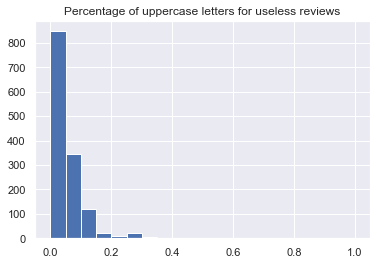

In [64]:
useless.reviews.apply(lambda x: count_upper_perc(x)).hist(bins=20)
plt.title("Percentage of uppercase letters for useless reviews")

# TF-IDF Words common to each class

## Useful

In [81]:
tfidf = TfidfVectorizer()
useful_tfidf = tfidf.fit_transform(useful.reviews).toarray()
feature_names = tfidf.get_feature_names_out ()
global_top10_idx = useful_tfidf.max(axis=0).argsort()[-50:]
np.asarray(feature_names)[global_top10_idx]

array(['refund', 'equalizer', 'notification', 'service', 'cueing',
       'heavy', 'answer', 'push', 'north', 'recognizing', 'protecting',
       'stupid', 'hate', 'stay', 'gifs', 'facebook', 'tracking',
       'perfectly', 'track', 's5', 'encrypted', '95', 'bugs', 'weekends',
       'big', 'cancel', 'sometimes', 'froze', 'loads', 'excellent',
       'credits', 'sign', 'lots', 'crap', 'crash', 'adds', 'iap',
       'improve', 'amounts', 'layout', 'detect', 'tongan', 'startup',
       'slow', 'sites', 'friendly', 'login', 'ios7', 'syncs', 'ilocano'],
      dtype=object)

## Useless

In [80]:
tfidf = TfidfVectorizer()
useless_tfidf = tfidf.fit_transform(useless.reviews).toarray()
feature_names = tfidf.get_feature_names_out ()
global_top10_idx = useless_tfidf.max(axis=0).argsort()[-50:]
np.asarray(feature_names)[global_top10_idx]

array(['alot', 'skype', 'best', 'like', 'try', 'pacman', 'speachless',
       'sometimes', '10', 'period', 'lectures', 'xyz', 'ylerps', 'ing',
       'versatile', 'slow', 'no', 'tweetnice', 'very', 'incredible',
       'alright', 'awesomeeeee', 'love', 'awesomeness', 'viber',
       'perfect', 'nice', 'fun', 'soon', 'tweetcaster', 'excellent', 'gn',
       'cool', 'fletes', 'amazing', 'hello', 'tnx', 'wonderful',
       'bestttt', 'ok', 'seamless', 'awesome', 'great', 'good',
       'fantastic', 'awsome', 'useful', 'poop', 'yes', 'a1'], dtype=object)